## Task 1



In [28]:
## Importing Required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [29]:
## Loading Data
df = pd.read_csv('pet_supplies_2212.csv')
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [30]:
df.shape

(1500, 8)

In [31]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [33]:
## Checking for null values in all columns
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [34]:
## Noticed there is 150 missing values in rating column , we need to replace them with 0 
df['rating'].fillna(0,inplace=True)

In [35]:
## checking again for missing Values 
df.isna().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [36]:
## Getting number of unique Values for the product id to check if there is 1500 unique product id
len(df.product_id.unique())

1500

In [37]:
## Checking on category column values 
df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64


In [38]:
## Noticed there is 25 values have the value "-" so we need to replace them with "Unknown"
df['category'].replace('-','Unknown',inplace=True)
df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64


In [39]:
## Checkhing on all values in animal column 
df.animal.value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64


In [41]:
## Noticed that there is some values is in upper case state so we need to change them to lower case
df['size'] = df['size'].str.lower()
df['size']

0        large
1       medium
2       medium
3        small
4        small
         ...  
1495    medium
1496     small
1497     small
1498     small
1499    medium
Name: size, Length: 1500, dtype: object

In [47]:
## Noticed that the price column is an object type and it should be a float, so we need to change it 
## also found another error when i tried to change the type to float that i found a value 'Unlisted', will replace it too
df['price'].replace('unlisted', 0, inplace = True)
df['price'] = df['price'].astype(float)
## replacing the zero value with median after we converted the type to float 
df['price'].replace(0, df['price'].median(), inplace = True)

In [48]:
## Checking on all data Types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


In [55]:
## Converting repeat_purchase column to a str
df['repeat_purchase'] = df['repeat_purchase'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 93.9+ KB


## Task 2

In [58]:
## see the distribution in numbers first
df.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

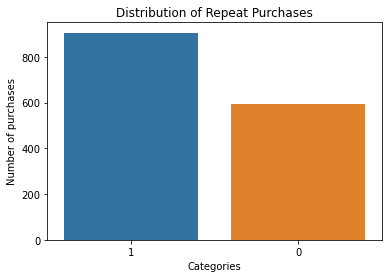

In [57]:
# Making a column chart to show how many products are repeat purchases
sns.countplot(data = df, x = 'repeat_purchase');
plt.title("Distribution of Repeat Purchases")
plt.xlabel("Categories")
plt.ylabel("Number of purchases");

We can see from the chart that products which is repeat Purchase is the highest number and it's count is 906

In [59]:
## Getting the data for only products whic is repeat purchase 
repeat_purchase = df[df['repeat_purchase'] == '1']
repeat_purchase

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1
10,11,Food,Dog,large,40.87,1457.22,7.0,1
...,...,...,...,...,...,...,...,...
1490,1491,Medicine,Cat,medium,20.14,746.16,7.0,1
1492,1493,Medicine,Cat,small,24.95,993.08,7.0,1
1493,1494,Housing,Fish,small,21.00,535.90,3.0,1
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [67]:
## see the distribution in numbers first
repeat_purchase.category.value_counts()

Equipment    221
Medicine     153
Housing      152
Food         151
Toys         145
Accessory     70
Unknown       14
Name: category, dtype: int64

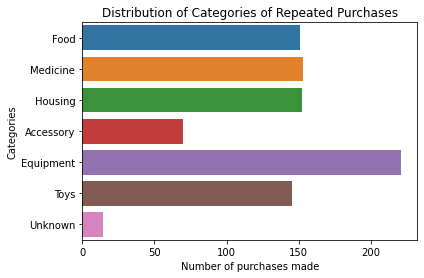

In [68]:
## Making a bar chart to show the number of observations across categories of the variable repeat purchases
sns.countplot(data =repeat_purchase , y = 'category');
plt.title('Distribution of Categories of Repeated Purchases')
plt.xlabel('Number of purchases made')
plt.ylabel('Categories');

Categories are not evenly distributed among repeat purchases. Equipment is the most repeat purchased Category.  Unkown category is the least purchased Category

## Task 3

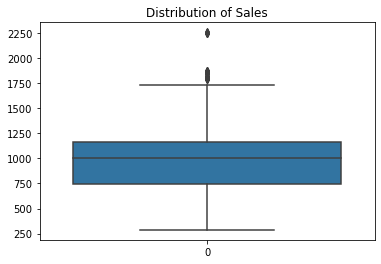

In [65]:
## Making a box plot to show the distribution of Sales
sns.boxplot(data=df['sales']);
plt.title('Distribution of Sales');

The minimum of sales is nearly 250 and the maximum was about 1750, there is outliers from the maximum value. The median of sales is nearly 1000.

_Write your answer here_

## Task 4

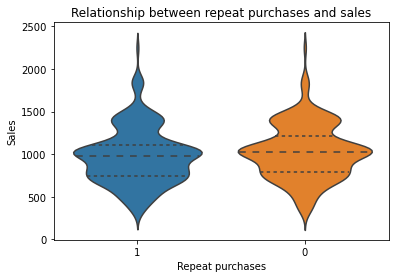

In [66]:
# Making a violin plot to show the distribution of all of the sales according to repeat purchase
sns.violinplot(data=df, x='repeat_purchase', y='sales', inner='quartile');
plt.title('Relationship between repeat purchases and sales')
plt.xlabel('Repeat purchases')
plt.ylabel('Sales');

Sales is distributed the same way between repeated purchases and not repeated purchases.